*Neural Network tutorial*

In [24]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

dimensions of X: (100, 2)
dimensiosn of y: (100, 1)


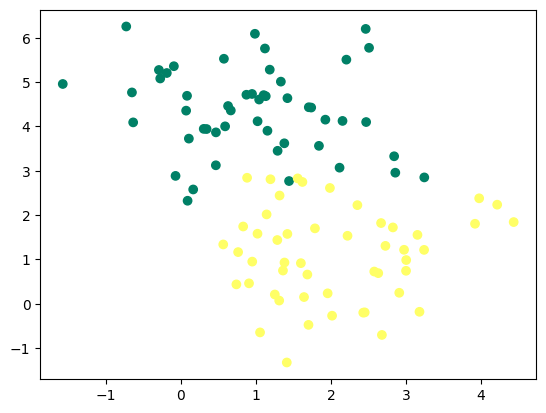

In [25]:
X, y = make_blobs(n_samples= 100, n_features= 2, centers = 2, random_state = 0)
y = y.reshape ((y.shape[0], 1))


print('dimensions of X:', X.shape)
print('dimensiosn of y:', y.shape)

plt.scatter (X[:,0], X[:, 1], c = y, cmap ='summer')
plt.show()


In [26]:
def initialisation(X):
  W = np.random.randn(X.shape[1], 1)
  b = np.random.randn(1) 
  return (W,b)


In [27]:
def model(X, W, b): 
  Z = X.dot(W) + b
  A = 1/(1+np.exp(-Z))
  return A
  


In [28]:
def log_loss(A, y):
  return 1/len(y) * np.sum(-y * np.log(A) - (1-y) * np.log(1-A))


In [29]:
def gradients(A, X, y):
  dW = 1/len(y) * np.dot(X.T, A-y)
  db = 1/len(y) * np.sum(A-y)
  return (dW, db)

In [30]:
def update(dW, db, W, b, learning_rate):
  W = W - learning_rate * dW
  b = b - learning_rate * db
  return (W,b)

In [31]:
def predict(X, W, b):
  A = model (X, W,b)
  return A >= 0.5

In [9]:
from sklearn.metrics import accuracy_score

In [33]:
def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100): 
  W, b = initialisation(X)

  Loss = []

  for i in range(n_iter):
    A = model(X, W, b)
    Loss.append(log_loss(A,y))
    dW, db = gradients(A, X, y)
    W, b = update(dW, db, W, b, learning_rate)

  y_pred = predict(X,W, b)
  print(accuracy_score(y, y_pred))

  plt.plot(Loss)
  plt.show()

  return (W,b)








    

0.9


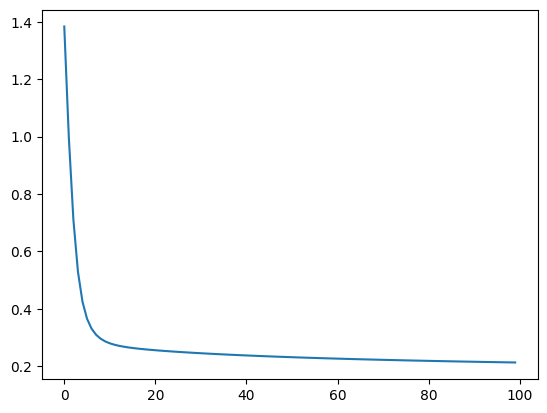

In [34]:
W, b = artificial_neuron(X,y)